In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt

In [22]:
a = dt.datetime.strptime('6/24/17', '%m/%d/%y')
b = dt.datetime.strptime('4/26/17', '%m/%d/%y')
b-a

datetime.timedelta(days=-59)

In [63]:
#Returns true if the project was completed during this record, false if not
def binarize(series):
    return series['PlanYear']<series['YearShift']
#Same function, but using charge date and completed date
def binarize1(series):
    return series['StatusDate']<series['ChargeDateShift']
#Same function using only 12 months before/after
def binarize2(series):
    a =  series['StatusDate']
    b = series['ChargeDateShift']
    if abs((b-a).days)<365:
        return float(a<b)
    else:
        return np.nan
#using months after/before instead of raw months
def prepost(series):
    a =  series['StatusDate']
    b = series['ChargeDateShift']
    if abs((b-a).days)<365:
        return (b.year - a.year) * 12 + b.month - a.month
    else:
        return np.nan
#Apply both the below functions to shift the charge date back one month
def shift_y(series):
    if series['Month'] == 1:
        return series['Year']-1
    else:
        return series['Year']
def shift_m(series):
    if series['Month'] == 1:
        return 12
    else:
        return series['Month']-1
#Convert MY to date
def toDateMY(series):
    y = series['YearShift']
    m = series['MonthShift']
    days_per_month = [31,28,31,30,31,30,31,31,30,31,30,31]
    days_per_month_ly =[31,29,31,30,31,30,31,31,30,31,30,31]
    if y%4 == 0:
        d = days_per_month_ly[int(m)-1]
    else:
        d = days_per_month[int(m)-1]
    return dt.datetime.strptime(""+str(int(series['YearShift']))+"-"+str(int(series['MonthShift']))+"-"+str(d), '%Y-%m-%d')
def toDate2(series):
    return dt.datetime.strptime(series, '%m/%d/%y')


In [75]:

df = pd.read_csv("/home/mirabel/Dropbox (GaTech)/CDS-2019-AlbanyHub/subsets of utilities/rep_rehab_utilities_sqft.csv")
df['YearShift'] = df[['Year', 'Month']].apply(shift_y, axis=1)
df['MonthShift'] = df[['Year', 'Month']].apply(shift_m, axis=1)

#group by month, year, address, type
sr = df[['YearShift', 'MonthShift', 'ServiceType', 'Address','StatusDate', 'ConsumptionPerSQFT']].copy()
df = sr.groupby(by=['YearShift', 'MonthShift', 'ServiceType', 'Address', 'StatusDate']).sum().reset_index()
df['ChargeDateShift'] = df[['YearShift', 'MonthShift']].apply(toDateMY, axis=1)
df['StatusDate'] = df['StatusDate'].apply(toDate2)
df['projectCompleted'] = df[['StatusDate', 'ChargeDateShift']].apply(binarize1, axis=1)
# sr = df[['MonthShift', 'YearShift', 'Address','ServiceType', 'PlanYear', 'ConsumptionPerSQFT']].copy()
# df = sr.groupby(by=['YearShift', 'MonthShift', 'ServiceType', 'Address', 'PlanYear']).sum().reset_index()
# df['projectCompleted'] = df[['YearShift', 'PlanYear']].apply(binarize, axis=1)

In [76]:
df.loc[12000:12030, :]

,YearShift,MonthShift,ServiceType,Address,StatusDate,ConsumptionPerSQFT,ChargeDateShift,projectCompleted
12000,2013,12,RGAS,1921 W HIGHLAND AVE,2012-10-22,0.060561,2013-12-31,True
12001,2013,12,RGAS,1925 S RIVERVIEW CIR,2009-09-15,0.065747,2013-12-31,True
12002,2013,12,RGAS,1934 S RIVERVIEW CIR,2017-09-06,0.056966,2013-12-31,False
12003,2013,12,RGAS,2000 COLQUITT AVE,2014-05-29,0.064846,2013-12-31,False
12004,2013,12,RGAS,2002 N SKYLANE DR,2008-04-16,0.043287,2013-12-31,True
12005,2013,12,RGAS,2004 COLQUITT AVE,2010-10-12,0.125335,2013-12-31,True
12006,2013,12,RGAS,2004 COLQUITT AVE,2011-02-14,0.125335,2013-12-31,True
12007,2013,12,RGAS,2004 W WHITNEY AVE,2013-01-25,0.041008,2013-12-31,True
12008,2013,12,RGAS,2007 EVERGREEN DR,2011-03-02,0.037594,2013-12-31,True
12009,2013,12,RGAS,2010 COLQUITT AVE,2011-09-01,0.060403,2013-12-31,True


In [77]:
def prepostchart(df1, df2, col, servicetype):
    plt.plot(df1.index, df1[col], label='Post-project') #post
    plt.plot(df2.index, df2[col], label='Pre-project') #pre
    
    plt.legend(loc='upper right')
    if servicetype == 'RELC':
        plt.title('Mean Electricity Consumption per Month')
        plt.ylabel("Mean KWH per SqFt")
    else:
        plt.title('Mean Gas Consumption per Month')
        plt.ylabel("Mean CCF per SqFt")
    plt.xlabel("Time")
    plt.xticks(np.arange(13), ('','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'))
    plt.savefig(servicetype+'.png')
    plt.show()


In [78]:


df_e_t = df[(df['ServiceType']=='RELC')&(df['projectCompleted']==1)]
df_e_f = df[(df['ServiceType']=='RELC')&(df['projectCompleted']==0)]

df_g_t = df[(df['ServiceType']=='RGAS')&(df['projectCompleted']==1)]
df_g_f = df[(df['ServiceType']=='RGAS')&(df['projectCompleted']==0)]

In [79]:


df1 = df_e_t.groupby(by='MonthShift').mean()
df2 = df_e_f.groupby(by='MonthShift').mean()
#prepostchart(df1, df2, 'Consumption', 'RELC')

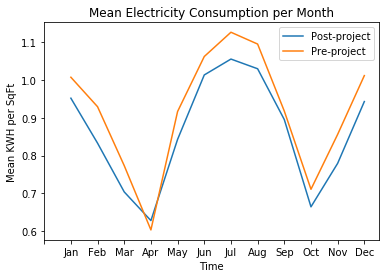

In [80]:
prepostchart(df1, df2, 'ConsumptionPerSQFT', 'RELC')

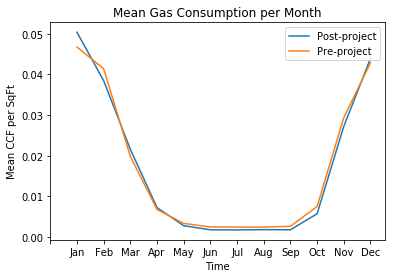

In [81]:
dfa = df_g_t.groupby(by='MonthShift').mean()
dfb = df_g_f.groupby(by='MonthShift').mean()
prepostchart(dfa, dfb, 'ConsumptionPerSQFT', 'RGAS')

In [92]:
stats.ttest_rel(dfa['ConsumptionPerSQFT'], dfb['ConsumptionPerSQFT'])

Ttest_relResult(statistic=4.1470659822304325, pvalue=0.0016244969382180952)

In [93]:
stats.ttest_rel(df1['ConsumptionPerSQFT'], df2['ConsumptionPerSQFT'])

Ttest_relResult(statistic=-2.0315486362626682, pvalue=0.06707204641241524)

In [60]:
df['Address'].nunique()

280

In [86]:
#Instead on a 0-11 scale
df = pd.read_csv("/home/mirabel/Dropbox (GaTech)/CDS-2019-AlbanyHub/subsets of utilities/rep_rehab_utilities_sqft.csv")
df['YearShift'] = df[['Year', 'Month']].apply(shift_y, axis=1)
df['MonthShift'] = df[['Year', 'Month']].apply(shift_m, axis=1)

#group by month, year, address, type
sr = df[['YearShift', 'MonthShift', 'ServiceType', 'Address','StatusDate', 'ConsumptionPerSQFT']].copy()
df = sr.groupby(by=['YearShift', 'MonthShift', 'ServiceType', 'Address', 'StatusDate']).sum().reset_index()
df['ChargeDateShift'] = df[['YearShift', 'MonthShift']].apply(toDateMY, axis=1)
df['StatusDate'] = df['StatusDate'].apply(toDate2)
df['projectCompleted'] = df[['StatusDate', 'ChargeDateShift']].apply(prepost, axis=1)

In [87]:
df_e_t = df[(df['ServiceType']=='RELC')&(df['projectCompleted']>=0)]
df_e_f = df[(df['ServiceType']=='RELC')&(df['projectCompleted']<0)]

df_g_t = df[(df['ServiceType']=='RGAS')&(df['projectCompleted']>=0)]
df_g_f = df[(df['ServiceType']=='RGAS')&(df['projectCompleted']<0)]

In [88]:
df1 = df_e_t.groupby(by='projectCompleted').mean()
df2 = df_e_f.groupby(by='projectCompleted').mean()
df2.index = range(11, -1, -1)

In [89]:
def prepostchart2(df1, df2, col, servicetype):
    plt.plot(df1.index, df1[col], label='Post-project') #post
    plt.plot(df2.index, df2[col], label='Pre-project') #pre
    
    plt.legend(loc='upper right')
    if servicetype == 'RELC':
        plt.title('Mean Electricity Consumption per Month')
        plt.ylabel("Mean KWH per SqFt")
    else:
        plt.title('Mean Gas Consumption per Month')
        plt.ylabel("Mean CCF per SqFt")
    plt.xlabel("Time")
    #plt.xticks(np.arange(13), range(0, 12))
    plt.savefig(servicetype+'-Num.png')
    plt.show()


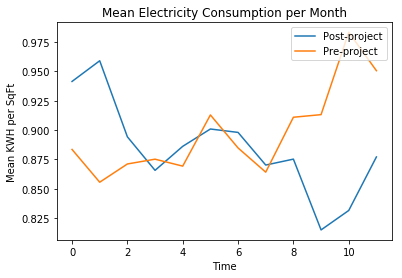

In [91]:
prepostchart2(df1, df2, 'ConsumptionPerSQFT', 'RELC')

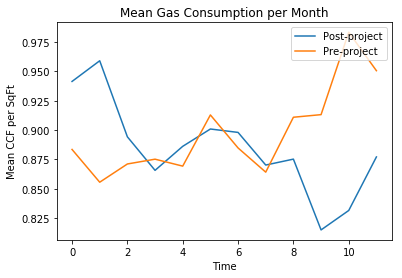

In [90]:
dfa = df_g_t.groupby(by='projectCompleted').mean()
dfb = df_g_f.groupby(by='projectCompleted').mean()
dfb.index = range(11, -1, -1)
prepostchart2(df1, df2, 'ConsumptionPerSQFT', 'RGAS')